Lab 2 - Part 1
Date: 2023-02-04
Winter 2023 GGE 4313

Data: Kings Landing Drone images "DJI_202107051450_005_VillageNadir_NS"
Datum: NAD83 Canadian Spatial Reference System
Coordinate System: NAD83(CSRS) / New Brunswick Stereographic

Part 1 implemented on "DJI_20210705151256_0168_W.JPG"
"""
@author: Abbas Salehi
"""

Import required packages

In [1]:
import math
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.optimize import leastsq as lstq
import sys
from math import cos, sin

Given variables from lab handout

In [2]:
# focal Length (mm)
f = 5.039

# PP pixel coords (pix)
u0 = 2004.984
v0 = 1448.630

# Perspective Center(meter)
XL = 2463539.499
YL = 7430884.88
ZL = 73.023236

# omega phi kappa in degree
omega = math.radians(0.34359)
phi = math.radians(0.241779)
kappa = math.radians(-2.190935)

# Optimized Ground coordinates of GCP PT09
X = 2463543.021
Y = 7430892
Z = 18.14

Rotation Matrix

In [3]:
M = np.array([[cos(phi) * cos(kappa),
               cos(omega) * sin(kappa) + sin(omega) * sin(phi) * cos(kappa),
               sin(omega) * sin(kappa) - cos(omega) * sin(phi) * cos(kappa)],

              [-cos(phi) * sin(kappa),
               cos(omega) * cos(kappa) - sin(omega) * sin(phi) * sin(kappa),
               sin(omega) * cos(kappa) + cos(omega) * sin(phi) * sin(kappa)],

              [sin(phi),
               -sin(omega) * cos(phi),
               cos(omega) * cos(phi)]])
print(M)

[[ 0.99926008 -0.03820374 -0.00444592]
 [ 0.03822937  0.99925198  0.00583104]
 [ 0.00421983 -0.00599669  0.99997312]]


Calculate the image coordinates
here you can see the collinearity equations
we change the direction of y-axis by multiplying a minus to make it same as image y-axis

In [4]:
delta_x =  - f * (M[0, 0] * (X - XL) + M[0, 1] * (Y - YL) + M[0, 2] * (Z - ZL)) / (
        M[2, 0] * (X - XL) + M[2, 1] * (Y - YL) + M[2, 2] * (Z - ZL))

delta_y =  - f * (M[1, 0] * (X - XL) + M[1, 1] * (Y - YL) + M[1, 2] * (Z - ZL)) / (
        M[2, 0] * (X - XL) + M[2, 1] * (Y - YL) + M[2, 2] * (Z - ZL))


convert delta_x and delta_y coordinates to pixel unit (Pixel size is in mm )
convert image coordinates to pixel coordinates 

In [5]:
Pixel_size= 0.00161797
delta_x_pix = delta_x/Pixel_size
delta_y_pix = delta_y/Pixel_size

u=u0+delta_x_pix
v=v0-delta_y_pix

# print x and y image coordinate in pixel
print('\nPixel Coordinates of GCP in pixel: \nu:', u, '\nv:', v)


Pixel Coordinates of GCP in pixel: 
u: 2203.0108158275048 
v: 1055.6101356061674


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

import image and project x and y on it

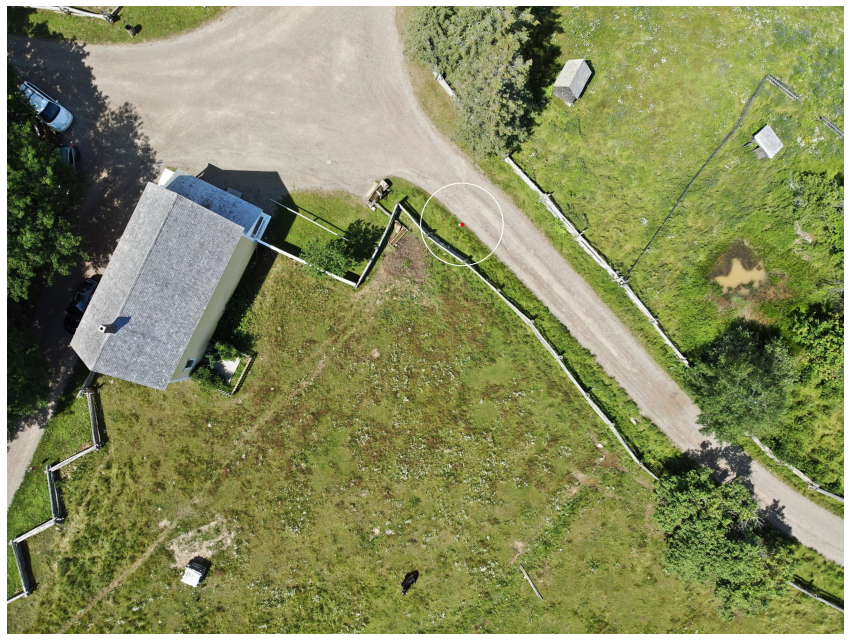

In [7]:
# img1= plt.imread('/content/drive/MyDrive/Colab Notebooks/img_0168.JPG')
img1= plt.imread('img_0168.JPG')

fig, ax = plt.subplots(1,figsize=(15, 15))

ax.imshow(img1)
ax.axis('off')
plt.scatter(u,v,s=30, marker='.',c='r')
circle = plt.Circle((u, v), 200, color='w',fill=0)
ax.add_patch(circle)
plt.show()